# Анализ ответов студентов

Анализ результатов анкетного опроса студентов факультета журналистики 2024 и 2025

In [1]:
url="https://raw.githubusercontent.com/yakushinav/journ/main/data.csv"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(url,index_col="Response")
print(df.head())

                Submitted on:  Institution  Department  \
Response                                                 
334       09/02/2024 19:32:00          NaN         NaN   
87        09/02/2024 11:57:18          NaN         NaN   
337       10/02/2024 01:38:34          NaN         NaN   
336       09/02/2024 22:14:31          NaN         NaN   
335       09/02/2024 19:32:32          NaN         NaN   

                           Course                Group  ID  Full name  \
Response                                                                
334       Журфак Информатика (РФ)   (Люди не в группе) NaN  Анонимно1   
87        Журфак Информатика (РФ)   (Люди не в группе) NaN  Анонимно2   
337       Журфак Информатика (РФ)   (Люди не в группе) NaN  Анонимно3   
336       Журфак Информатика (РФ)   (Люди не в группе) NaN  Анонимно4   
335       Журфак Информатика (РФ)   (Люди не в группе) NaN  Анонимно5   

          Username Complete    Q01_Имя  Q02_Возраст  Q03_День рождения  \
Respons

In [4]:
df.columns

Index(['Submitted on:', 'Institution', 'Department', 'Course', 'Group', 'ID',
       'Full name', 'Username', 'Complete', 'Q01_Имя', 'Q02_Возраст',
       'Q03_День рождения', 'Q04_Месяц рождения', 'Q05_Рост в сантиметрах',
       'Q06_Ваш родной город', 'Q07_Средний балл',
       'Q08_Бросили игральный кубик с цифр', 'Q09_Ваш любимый цвет',
       'Q10_Напишите фразу', 'Q11_Данная цитата'],
      dtype='object')

In [5]:
df.shape

(609, 20)

In [6]:
df.drop(['Submitted on:', 'Institution', 'Department', 'Course', 'Group', 'ID',
       'Full name', 'Username', 'Complete'],axis=1,inplace=True)

In [7]:
print(df.head())

            Q01_Имя  Q02_Возраст  Q03_День рождения  Q04_Месяц рождения  \
Response                                                                  
334          Даниил         19.0                 19                 5.0   
87        Екатерина         19.0                  4                11.0   
337          Дарья          20.0                 30                 6.0   
336          София          18.0                 15                 2.0   
335         Николай         23.0                 20                10.0   

          Q05_Рост в сантиметрах Q06_Ваш родной город  Q07_Средний балл  \
Response                                                                  
334                          181               Москва              5.00   
87                           166            Чебоксары              3.75   
337                          170         Калининград               4.40   
336                          166          Красный Луч              4.75   
335                     

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 334 to 349
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Q01_Имя                             609 non-null    object 
 1   Q02_Возраст                         604 non-null    float64
 2   Q03_День рождения                   609 non-null    int64  
 3   Q04_Месяц рождения                  606 non-null    float64
 4   Q05_Рост в сантиметрах              609 non-null    int64  
 5   Q06_Ваш родной город                604 non-null    object 
 6   Q07_Средний балл                    518 non-null    float64
 7   Q08_Бросили игральный кубик с цифр  551 non-null    object 
 8   Q09_Ваш любимый цвет                609 non-null    object 
 9   Q10_Напишите фразу                  609 non-null    object 
 10  Q11_Данная цитата                   609 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage:

In [9]:
df.isnull().sum()

,0
Q01_Имя,0
Q02_Возраст,5
Q03_День рождения,0
Q04_Месяц рождения,3
Q05_Рост в сантиметрах,0
Q06_Ваш родной город,5
Q07_Средний балл,91
Q08_Бросили игральный кубик с цифр,58
Q09_Ваш любимый цвет,0
Q10_Напишите фразу,0


In [10]:
df.describe()

,Q02_Возраст,Q03_День рождения,Q04_Месяц рождения,Q05_Рост в сантиметрах,Q07_Средний балл
count,604.000000,609.000000,606.000000,609.000000,518.000000
mean,18.286424,15.840722,6.506601,168.361248,6.547722
std,0.976888,8.662490,3.442437,7.409601,29.228344
min,17.000000,1.000000,1.000000,149.000000,0.000000
25%,18.000000,8.000000,3.000000,163.000000,4.347500
50%,18.000000,17.000000,7.000000,168.000000,5.000000
75%,18.000000,23.000000,9.000000,172.000000,5.000000
max,30.000000,31.000000,12.000000,195.000000,475.000000


In [11]:
df=df[df["Q07_Средний балл"]<=5.0]

In [12]:
#Заменяем пропущенные значения на среднее
df["Q07_Средний балл"].replace(to_replace=np.nan,value=df["Q07_Средний балл"].mean(),inplace=True)
#Заменяем пропущенные значения на моду
df["Q08_Бросили игральный кубик с цифр"].replace(to_replace=np.nan,value=df["Q08_Бросили игральный кубик с цифр"].mode()[0],inplace=True)
#Заменяем пропущенные значения на моду
df["Q06_Ваш родной город"].replace(to_replace=np.nan,value=df["Q06_Ваш родной город"].mode()[0],inplace=True)
#Заменяем пропущенные значения на моду
df["Q02_Возраст"].replace(to_replace=np.nan,value=df["Q02_Возраст"].mode()[0],inplace=True)
#Заменяем пропущенные значения на моду
df["Q04_Месяц рождения"].replace(to_replace=np.nan,value=df["Q04_Месяц рождения"].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

,0
Q01_Имя,0
Q02_Возраст,0
Q03_День рождения,0
Q04_Месяц рождения,0
Q05_Рост в сантиметрах,0
Q06_Ваш родной город,0
Q07_Средний балл,0
Q08_Бросили игральный кубик с цифр,0
Q09_Ваш любимый цвет,0
Q10_Напишите фразу,0


In [14]:
#преобразование категориальных полей
print(df["Q08_Бросили игральный кубик с цифр"])
df["Q08_Бросили игральный кубик с цифр"]=df["Q08_Бросили игральный кубик с цифр"].str.split(' ',expand=True)[0].astype(np.number)
df["Q08_Бросили игральный кубик с цифр"]=df["Q08_Бросили игральный кубик с цифр"].astype(np.number)
print(df["Q08_Бросили игральный кубик с цифр"])

Response
334    6 : 6
87     4 : 4
337    6 : 6
336    4 : 4
335    1 : 1
       ...  
367    4 : 4
350    6 : 6
365    4 : 4
354    4 : 4
349    5 : 5
Name: Q08_Бросили игральный кубик с цифр, Length: 512, dtype: object
Response
334    6.0
87     4.0
337    6.0
336    4.0
335    1.0
      ... 
367    4.0
350    6.0
365    4.0
354    4.0
349    5.0
Name: Q08_Бросили игральный кубик с цифр, Length: 512, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


<Axes: xlabel='Q08_Бросили игральный кубик с цифр'>

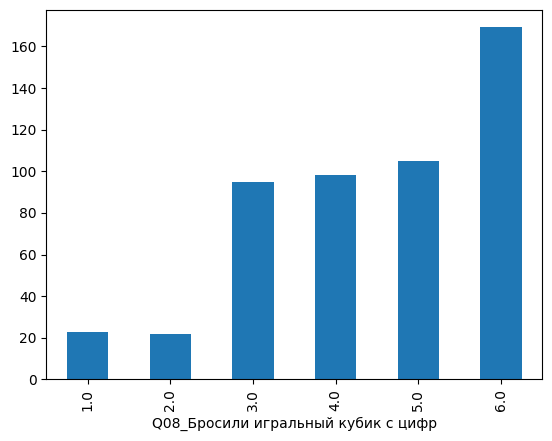

In [15]:
cube=df.groupby("Q08_Бросили игральный кубик с цифр").size()
cube.plot.bar()

In [16]:
#преобразование категориальных полей
print(df["Q11_Данная цитата"])
df["Q11_Данная цитата"]=df["Q11_Данная цитата"].str.split(' ',expand=True)[0].astype(np.number)
df["Q11_Данная цитата"]=df["Q11_Данная цитата"].astype(np.number)
print(df["Q11_Данная цитата"])

Response
334        2 : Платон
87         2 : Платон
337    1 : Аристотель
336    1 : Аристотель
335    1 : Аристотель
            ...      
367        2 : Платон
350    1 : Аристотель
365    1 : Аристотель
354    1 : Аристотель
349    1 : Аристотель
Name: Q11_Данная цитата, Length: 512, dtype: object
Response
334    2.0
87     2.0
337    1.0
336    1.0
335    1.0
      ... 
367    2.0
350    1.0
365    1.0
354    1.0
349    1.0
Name: Q11_Данная цитата, Length: 512, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


<Axes: xlabel='Q11_Данная цитата'>

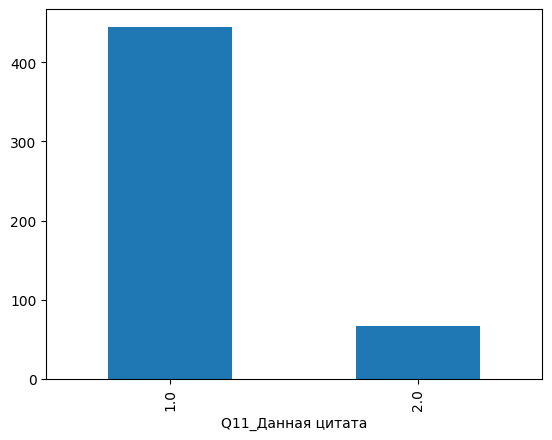

In [17]:
cite=df.groupby("Q11_Данная цитата").size()
cite.plot.bar()

In [18]:
print(df.describe())

       Q02_Возраст  Q03_День рождения  Q04_Месяц рождения  \
count   512.000000         512.000000          512.000000   
mean     18.320312          15.857422            6.398438   
std       1.021749           8.740059            3.460914   
min      17.000000           1.000000            1.000000   
25%      18.000000           8.000000            3.000000   
50%      18.000000          17.000000            7.000000   
75%      18.000000          23.000000            9.000000   
max      30.000000          31.000000           12.000000   

       Q05_Рост в сантиметрах  Q07_Средний балл  \
count              512.000000        512.000000   
mean               168.572266          4.656699   
std                  7.383979          0.501207   
min                150.000000          0.000000   
25%                163.750000          4.330000   
50%                168.000000          5.000000   
75%                172.000000          5.000000   
max                195.000000          5.0

In [19]:
#Возраст
feature="Q02_Возраст"
print(df[feature].describe())
print("Среднее= ",df[feature].mean())
print("Мода= ",df[feature].mode())
print("Медиана= ",df[feature].median())
print(df.groupby(feature).size())

count    512.000000
mean      18.320312
std        1.021749
min       17.000000
25%       18.000000
50%       18.000000
75%       18.000000
max       30.000000
Name: Q02_Возраст, dtype: float64
Среднее=  18.3203125
Мода=  0    18.0
Name: Q02_Возраст, dtype: float64
Медиана=  18.0
Q02_Возраст
17.0     35
18.0    353
19.0     87
20.0     21
21.0      6
22.0      6
23.0      2
24.0      1
30.0      1
dtype: int64


<Axes: xlabel='Q02_Возраст'>

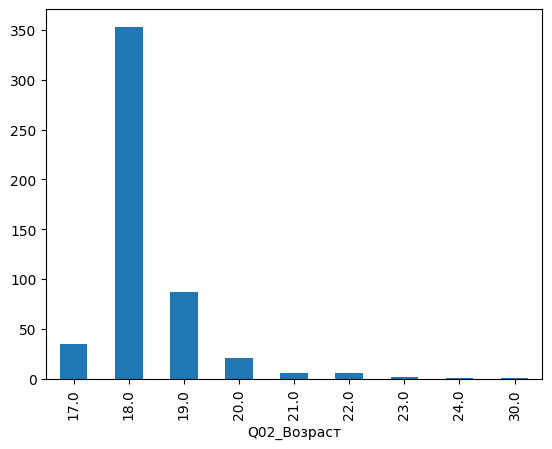

In [20]:
age=df.groupby("Q02_Возраст").size()
age.plot.bar()

<Axes: xlabel='Q11_Данная цитата', ylabel='Q02_Возраст'>

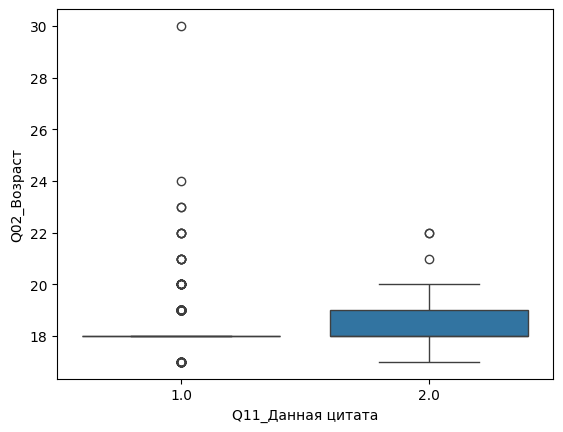

In [21]:
sns.boxplot(x="Q11_Данная цитата", y="Q02_Возраст", data=df)

In [22]:
#Q03_День рождения
feature="Q03_День рождения"
print(df[feature].describe())
print("Среднее= ",df[feature].mean())
print("Мода= ",df[feature].mode())
print("Медиана= ",df[feature].median())
print(df.groupby(feature).size())

count    512.000000
mean      15.857422
std        8.740059
min        1.000000
25%        8.000000
50%       17.000000
75%       23.000000
max       31.000000
Name: Q03_День рождения, dtype: float64
Среднее=  15.857421875
Мода=  0    8
Name: Q03_День рождения, dtype: int64
Медиана=  17.0
Q03_День рождения
1     18
2     18
3     14
4     15
5     14
6     16
7     15
8     31
9     12
10    19
11    15
12    10
13    14
14    13
15    21
16     8
17    16
18    19
19    18
20    27
21    22
22    19
23    18
24    16
25    14
26    22
27    20
28    12
29    10
30    14
31    12
dtype: int64


<Axes: xlabel='Q03_День рождения'>

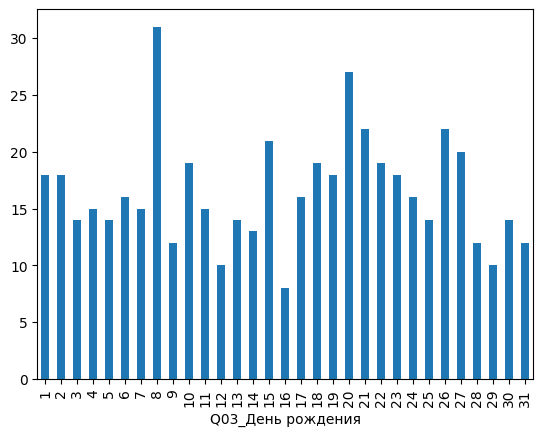

In [24]:
days=df.groupby("Q03_День рождения").size()
days.plot.bar()

In [25]:
#Q04_Месяц рождения
feature="Q04_Месяц рождения"
print(df[feature].describe())
print("Среднее= ",df[feature].mean())
print("Мода= ",df[feature].mode())
print("Медиана= ",df[feature].median())
print(df.groupby(feature).size())

count    512.000000
mean       6.398438
std        3.460914
min        1.000000
25%        3.000000
50%        7.000000
75%        9.000000
max       12.000000
Name: Q04_Месяц рождения, dtype: float64
Среднее=  6.3984375
Мода=  0    1.0
Name: Q04_Месяц рождения, dtype: float64
Медиана=  7.0
Q04_Месяц рождения
1.0     52
2.0     46
3.0     37
4.0     34
5.0     42
6.0     42
7.0     48
8.0     45
9.0     48
10.0    39
11.0    43
12.0    36
dtype: int64


<Axes: xlabel='Q04_Месяц рождения'>

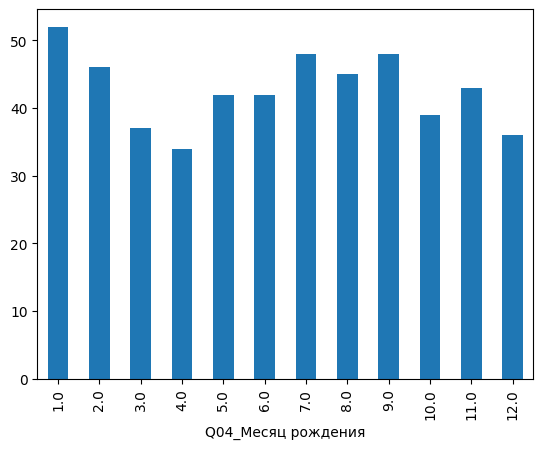

In [26]:
month=df.groupby("Q04_Месяц рождения").size()
month.plot.bar()

In [27]:
#Q05_Рост в сантиметрах
feature="Q05_Рост в сантиметрах"
print(df[feature].describe())
print("Среднее= ",df[feature].mean())
print("Мода= ",df[feature].mode())
print("Медиана= ",df[feature].median())
print(df.groupby(feature).size())

count    512.000000
mean     168.572266
std        7.383979
min      150.000000
25%      163.750000
50%      168.000000
75%      172.000000
max      195.000000
Name: Q05_Рост в сантиметрах, dtype: float64
Среднее=  168.572265625
Мода=  0    170
Name: Q05_Рост в сантиметрах, dtype: int64
Медиана=  168.0
Q05_Рост в сантиметрах
150     2
151     1
153     1
154     1
155     6
156     3
157     4
158    17
159     9
160    21
161     7
162    24
163    32
164    30
165    41
166     7
167    26
168    41
169    13
170    63
171    11
172    25
173    18
174     9
175    24
176    12
177     5
178    17
179     6
180     8
181     1
182     4
183     3
184     3
185     3
187     3
188     2
190     1
191     2
193     4
194     1
195     1
dtype: int64


<Axes: xlabel='Q05_Рост в сантиметрах'>

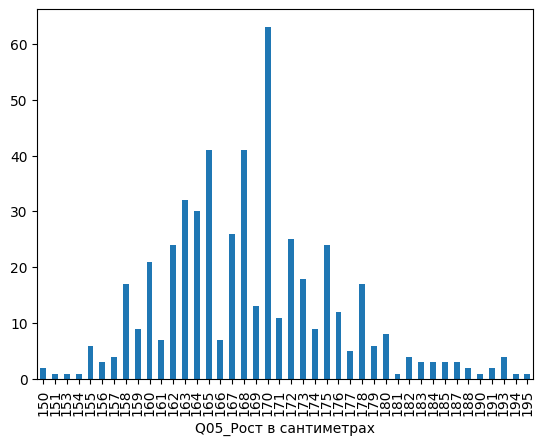

In [28]:
height=df.groupby("Q05_Рост в сантиметрах").size()
height.plot.bar()

<Axes: ylabel='Density'>

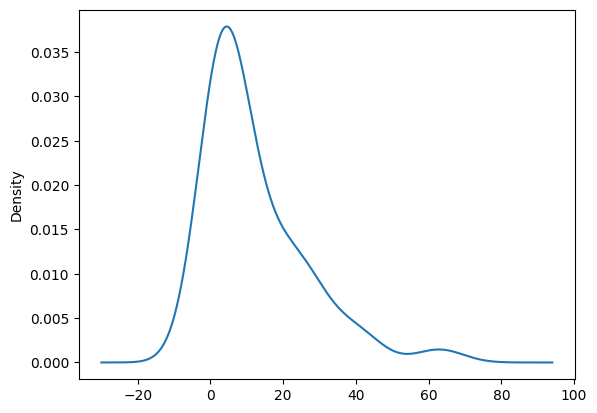

In [29]:
height.plot.kde()

<Axes: ylabel='Density'>

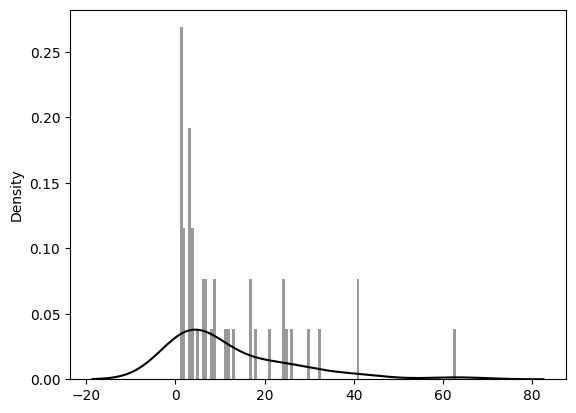

In [30]:
sns.distplot(height, bins=100, color='k')

In [31]:
#Q07_Средний балл
feature="Q07_Средний балл"
print(df[feature].describe())
print("Среднее= ",df[feature].mean())
print("Мода= ",df[feature].mode())
print("Медиана= ",df[feature].median())
print(df.groupby(feature).size())

count    512.000000
mean       4.656699
std        0.501207
min        0.000000
25%        4.330000
50%        5.000000
75%        5.000000
max        5.000000
Name: Q07_Средний балл, dtype: float64
Среднее=  4.65669921875
Мода=  0    5.0
Name: Q07_Средний балл, dtype: float64
Медиана=  5.0
Q07_Средний балл
0.00      1
2.50      1
3.00      2
3.25      3
3.33      1
3.50      7
3.66      1
3.75     13
3.76      1
3.80      1
4.00     61
4.10      1
4.20      1
4.25     27
4.30      4
4.33      5
4.40      1
4.50     37
4.60      6
4.66      4
4.67      2
4.70      3
4.75     52
4.85      1
4.90      1
4.95      1
5.00    274
dtype: int64


<Axes: xlabel='Q07_Средний балл'>

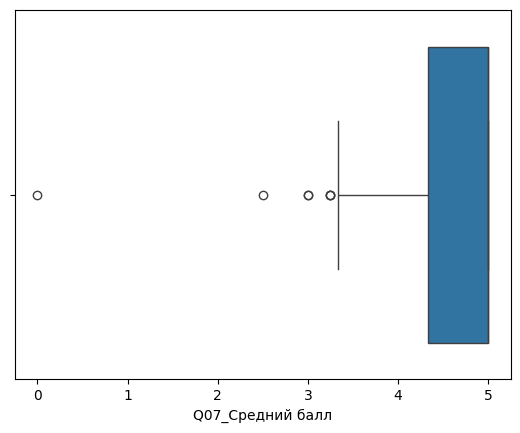

In [32]:
sns.boxplot(x=df["Q07_Средний балл"])

In [33]:
df[(df["Q07_Средний балл"]>5.0) | (df["Q07_Средний балл"]<2.0)]

,Q01_Имя,Q02_Возраст,Q03_День рождения,Q04_Месяц рождения,Q05_Рост в сантиметрах,Q06_Ваш родной город,Q07_Средний балл,Q08_Бросили игральный кубик с цифр,Q09_Ваш любимый цвет,Q10_Напишите фразу,Q11_Данная цитата
Response,,,,,,,,,,,
294,Мосикян,18.0,18,5.0,163,Вологда,0.0,5.0,черный,ульяна высоко прыгнула,1.0


In [35]:
df=df[~((df["Q07_Средний балл"]>5.0) | (df["Q07_Средний балл"]<2.0))]

In [36]:
df[(df["Q07_Средний балл"]>5.0) | (df["Q07_Средний балл"]<2.0)]

,Q01_Имя,Q02_Возраст,Q03_День рождения,Q04_Месяц рождения,Q05_Рост в сантиметрах,Q06_Ваш родной город,Q07_Средний балл,Q08_Бросили игральный кубик с цифр,Q09_Ваш любимый цвет,Q10_Напишите фразу,Q11_Данная цитата
Response,,,,,,,,,,,


<Axes: xlabel='Q07_Средний балл'>

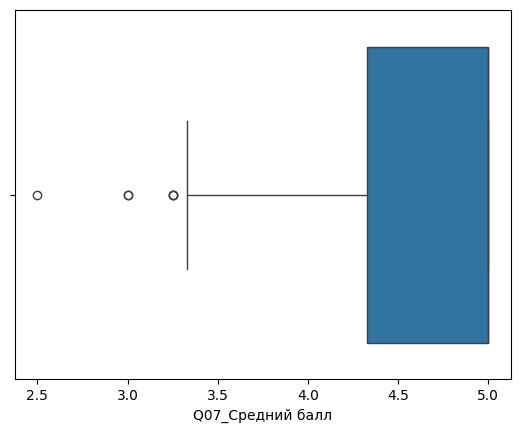

In [37]:
sns.boxplot(x=df["Q07_Средний балл"])

<Axes: xlabel='Q07_Средний балл'>

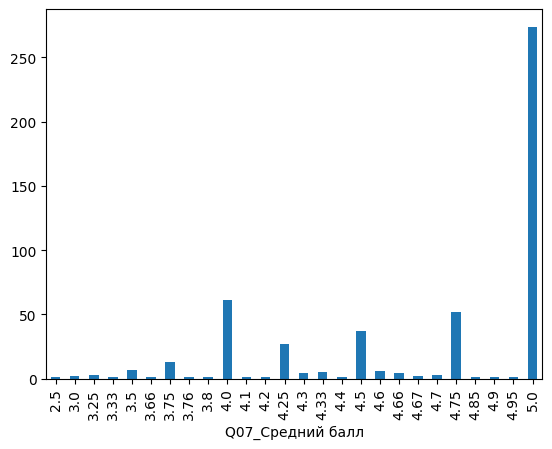

In [38]:
ball=df.groupby("Q07_Средний балл").size()
ball.plot.bar()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 334 to 349
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Q01_Имя                             511 non-null    object 
 1   Q02_Возраст                         511 non-null    float64
 2   Q03_День рождения                   511 non-null    int64  
 3   Q04_Месяц рождения                  511 non-null    float64
 4   Q05_Рост в сантиметрах              511 non-null    int64  
 5   Q06_Ваш родной город                511 non-null    object 
 6   Q07_Средний балл                    511 non-null    float64
 7   Q08_Бросили игральный кубик с цифр  511 non-null    float64
 8   Q09_Ваш любимый цвет                511 non-null    object 
 9   Q10_Напишите фразу                  511 non-null    object 
 10  Q11_Данная цитата                   511 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage:

In [40]:
data=df.groupby("Q09_Ваш любимый цвет").size().sort_values(ascending=False)
cc=list(data.index)
print("\n".join(cc))


Красный
Синий
Черный
Голубой
Фиолетовый
розовый
Белый
красный
Розовый
Зеленый
синий
Белый 
Зелёный
Красный 
красный 
черный
белый
Бордовый
Фиолетовый 
Голубой 
голубой
Коричневый
Сиреневый
Розовый 
Чёрный
зелёный
фиолетовый
Зеленый 
Желтый
Синий 
Черный 
зеленый
Зелёный 
Желтый 
желтый
Бежевый
Оранжевый
Коричневый 
Бирюзовый 
белый 
коричневый
фиолетовый 
розовый 
Серый
Жёлтый
жёлтый
Нет
Чёрный 
черный 
зеленый 
бежевый 
оранжевый 
оранжевый
чёрный
синий 
серый
Оранжевый 
Бордовый 
Лиловый
Серобуромалиновый
Бирюзово-голубой 
Белый  
Алый
Молочный 
Малиновый 
Зеленый белый красный
Затягивающий глаз
Их много
Изумрудный 
Ультрамарин
Темный
Синий, красный
Сиреневый 
Серый 
Небесный
Мятный
Неба
Никакой
Нет такого 
Небесно-голубой
Отсутствует
Пыльно-розовый
Пастельный
Розовый, белый 
Сереневый
Жëлтый
Васильковый
Вишневый 
Все люблю 
Бирюзовый
Бордовый   
Бунгурди 
Бургунди
голубой 
бордовый
все
все цвета 
бирюзовый=
бирюзовый
Янтарный» и «еловая тень»
Шоколадный
малиновый
любой, кроме оранже

In [41]:
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.lower()
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.strip()
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("ё","е")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("="," ")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(","," ")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("."," ")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("/"," ")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.strip()
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.split(' ',expand=True)[0]
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("коасный","красный")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("шоколадный","коричневый")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("золотой","золото")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("золото","золотой")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("жëлтый","желтый")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("пыльно-розовый","розовый")
df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace("небесно-голубой","голубой")



df.groupby("Q09_Ваш любимый цвет").size().sort_values(ascending=False)

,0
Q09_Ваш любимый цвет,
красный,68
черный,52
зеленый,47
синий,47
розовый,43
белый,42
голубой,38
фиолетовый,38
желтый,16


In [42]:


s=["сереневый","синенький","сиреневый","темно-синий","темно","ультрамарин","синий-зеленый","синетнький"]
for x in s:
  df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(x,"синий")

s=["васильковый","лазурный","неба","небесный","неба","пастельный","нежно-голубой","нежно"]
for x in s:
  df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(x,"голубой")

s=["изумрудный","мятный","оливковый"]
for x in s:
  df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(x,"зеленый")

s=["алый","малиновый","марсала","бунгурди","вишневый","вишневый","бургунди","янтарный»"]
for x in s:
  df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(x,"красный")

s=["молочный"]
for x in s:
  df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(x,"белый")

s=["все","любой","никакой","оттенки","пастельные","разный","цвет","затягивающий","отсутствует","нежно","темный","не-голубой"]
for x in s:
  df["Q09_Ваш любимый цвет"]=df["Q09_Ваш любимый цвет"].str.replace(x,"нет")

#Заменяем некорректные значения
df["Q09_Ваш любимый цвет"].replace(to_replace="не",value="нет",inplace=True)
df["Q09_Ваш любимый цвет"].replace(to_replace="их",value="нет",inplace=True)

df.groupby("Q09_Ваш любимый цвет").size().sort_values(ascending=False)

,0
Q09_Ваш любимый цвет,
красный,76
синий,61
черный,52
зеленый,52
голубой,45
белый,43
розовый,43
фиолетовый,38
нет,17


<Axes: xlabel='Q09_Ваш любимый цвет'>

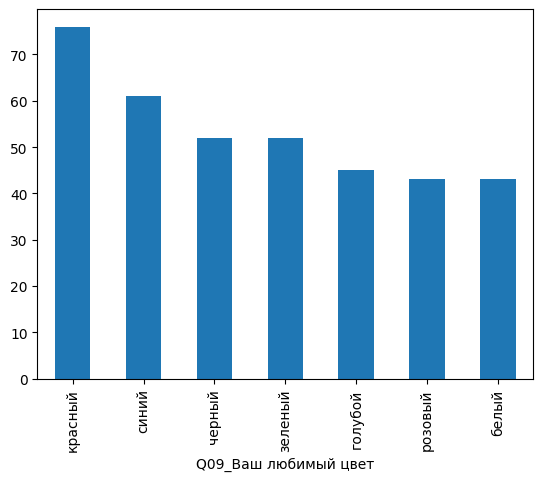

In [43]:
colors=df["Q09_Ваш любимый цвет"].value_counts().sort_values(ascending=False).head(7)
colors.plot.bar()


<Axes: >

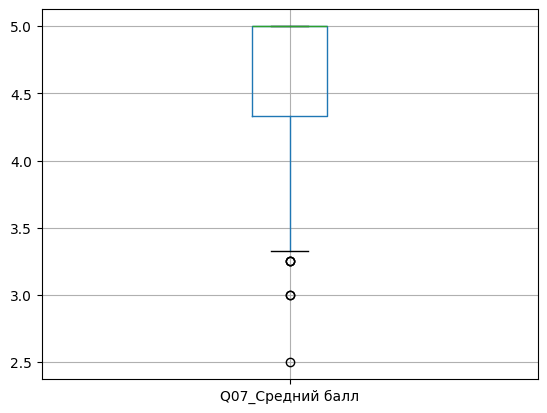

In [44]:
df.boxplot(column="Q07_Средний балл")

In [45]:
df["Q06_Ваш родной город"]=df["Q06_Ваш родной город"].str.lower()
df["Q06_Ваш родной город"]=df["Q06_Ваш родной город"].str.strip()
df["Q06_Ваш родной город"]=df["Q06_Ваш родной город"].str.replace("ё","е")
df["Q06_Ваш родной город"]=df["Q06_Ваш родной город"].str.replace("москвп","москва")
#lst=df.groupby("Q06_Ваш родной город").size().sort_values(ascending=False)
lst=df.groupby("Q06_Ваш родной город").size()
lst=list(lst.index)

In [46]:
print(lst)
print(len(lst))

['азов', 'алексин', 'алма-ата', 'алматы', 'анжеро-судженск', 'ардатов', 'армавир', 'астрахань', 'афины', 'балашиха', 'барнаул', 'белгород', 'бельцы', 'благовещенск', 'бор', 'братск', 'брянск', 'видное', 'владивосток', 'владикавказ', 'владимир', 'власиха', 'волгоград', 'волгодонск', 'вологда', 'волхов', 'воронеж', 'вэйфан', 'вэньчжоу', 'гагарин', 'грозный', 'гуандун', 'губкин', 'губкинский', 'дзержинск', 'долгопрудный', 'донецк', 'дубна', 'егорьевск', 'екатеринбург', 'зарайск', 'зеленоград', 'иваново', 'ижевск', 'иркутск', 'истра', 'казань', 'калининград', 'калуга', 'каменка пензенская область', 'каменск-шахтинский', 'кельн', 'киров', 'китай', 'клин', 'когалым', 'комсомольск-на-амуре', 'королев', 'красногорск', 'краснодар', 'красное', 'красноярск', 'красный луч', 'кумертау', 'латакия', 'липецк', 'лэшань', 'люберцы', 'магнитогорск', 'махачкала', 'михайловка', 'мичуринск', 'москва', 'мурманск', 'мытищи', 'нальчик', 'нанкин,китай', 'нарьян-мар', 'нефтеюганск', 'нижний новгород', 'нижний та

<Axes: xlabel='Q06_Ваш родной город'>

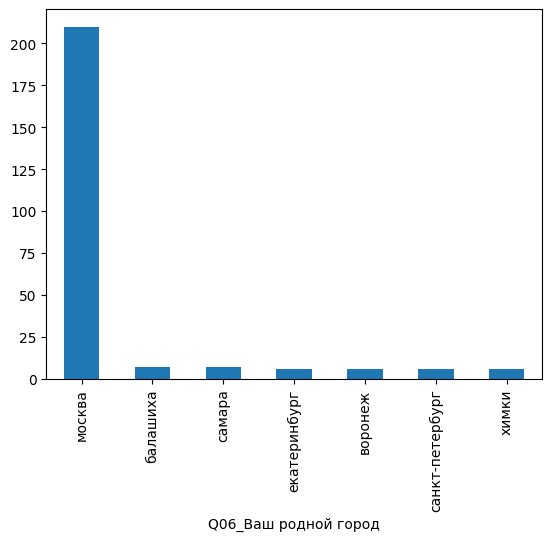

In [47]:
cities=df["Q06_Ваш родной город"].value_counts().sort_values(ascending=False).head(7)
cities.plot.bar()


In [48]:
name="Q01_Имя"
df[name]=df[name].str.lower()
df[name]=df[name].str.strip()
df[name]=df[name].str.replace("ё","е")
df.groupby(name).size()
full_names=df[df[name].str.contains(" ")].groupby(name).size()
print("\n".join(list(full_names.index)))

александр вадимович воеводин
анастасия замятина
балова арислава
брыскова ульяна
валерия бахтина
ван бо
ван цзэхао
василиса лаврентьева
вязников сергей алексеевич
иванов ростислав
исаева софия
коляда элина
лада фатнева
ло лэй
лю фаньчан
лю цзинцзюнь
лю юйхань
лю юйцзэ
люй цзэчэнь
ма вэньцзин
мария коротылева
николаева варвара сергеевна
олеся оводова
орлова вероника
рудаева анастасия
светлана кузьменко
смирнова анна тамазовна
смирнова татьяна игоревна
софья бекбосынова
сюй хэнань
тайлер дерден
фань юйчэн
ху юйсинь
чернова алла сергеевна
чжоу лэй
ши синьлинь
ю юн
юань чжипзн
юй канин
ян цзиньтунлинь
яна анциферова


In [49]:
full_names=list(full_names.index)
print(type(full_names))
rep={}
for x in full_names:
  rep[x]=x.split(" ")
rep={'брыскова ульяна': 'ульяна','рудаева анастасия':'анастасия', 'исаева софья':'софия', 'орлова вероника':'вероника',  'чернова алла сергеевна':'алла','яна анциферова':'яна',  'светлана кузьменко':'светлана', 'смирнова татьяна игоревна':'татьяна', 'вязников сергей алексеевич':'сергей','олеся оводова':'олеся', 'исаева софия':'софия','лада фатнева':'лада','мария коротылева':'мария', 'коляда элина':'элина', 'александр вадимович воеводин':'александр','анастасия замятина':'анастасия','балова арислава':'арислава', 'валерия бахтина':'валерия', 'василиса лаврентьева':'василиса', 'валерия кузьменко': 'валерия', 'ван бо': 'бо', 'ван цзэхао':'цзэхао', 'захаренкова вероника игоревна': 'вероника', 'иванов ростислав': 'ростислав', 'ло лэй': 'лэй', 'лю фаньчан': 'фаньчан', 'лю цзинцзюнь': 'цзинцзюнь', 'лю юйхань': 'юйхань', 'лю юйцзэ': 'юйцзэ', 'люй цзэчэнь': 'цзэчэнь', 'ма вэньцзин': 'вэньцзин', 'николаева варвара сергеевна': 'варвара', 'смирнова анна тамазовна': 'анна', 'софья бекбосынова': 'софья', 'сюй хэнань': 'хэнань', 'сюй цияци': 'цияци', 'тайлер дерден': 'дерден', 'фань юйчэн': 'юйчэн', 'ху юйсинь': 'юйсинь', 'чжоу лэй': 'лэй', 'ши синьлинь': 'синьлинь', 'ю юн': 'юн', 'юань чжипзн': 'чжипзн', 'юй канин': 'канин', 'ян цзиньтунлинь': 'цзиньтунлинь'}
df=df.replace(rep)

<class 'list'>


In [50]:
names=list(df.groupby(name).size().index)
print("\n".join(names))
df[name]=df[name].str.replace("аня","анна")
df[name]=df[name].str.replace("варя","варвара")
df[name]=df[name].str.replace("вика","виктория")
df[name]=df[name].str.replace("глаша","глафира")
df[name]=df[name].str.replace("маша","мария")
df[name]=df[name].str.replace("настя","анастасия")
df[name]=df[name].str.replace("соня","софья")
df[name]=df[name].str.replace("софия","софья")
df[name]=df[name].str.replace("варя","варвара")
df[name]=df[name].str.replace("геша","геннадий")
df[name]=df[name].str.replace("никиточка","никита")
df[name]=df[name].str.replace("катя","екатерина")
df[name]=df[name].str.replace("маивей","матвей")





агния
аксинья
алан
александр
александра
алексей
алена
алина
алиса
алла
амалия
амина
амир
анастасия
ангелина
андрей
анжелика
анисия
анита
анна
аня
арина
арислава
артем
бо
борис
валерия
варвара
варя
василиса
вера
вероника
вика
виктория
виталия
влада
владислав
владислава
вэньцзин
георгий
геша
глаша
григорий
дана
даниил
данил
даня
дарья
денис
дерден
диана
дина
динара
ева
евгения
егор
екатерина
елена
елизавета
есения
жанна
иван
илона
илья
инга
ирина
камила
камилла
канин
карина
каролина
катерина
катя
кира
клим
кристина
ксения
ксюша
лада
лейла
лиза
лилия
лэй
любовь
людмила
маивей
майя
максим
малика
маргарита
марина
мария
матвей
милан
милана
милена
михаил
моника
надежда
настя
наталья
нателла
никиточка
николай
нина
олеся
ольга
павел
платон
полина
рамиль
рената
римма
роман
ростислав
самира
светлана
селима
сергей
синьлинь
соня
софия
софья
стефания
сюйяо
татьяна
тимофей
тимур
ульяна
фаньчан
хамис
хэнань
цзинцзюнь
цзиньтунлинь
цзэхао
цзэчэнь
чжипзн
эдвард
элеонора
элина
элла
эльвира
эля
эмилия
эрик

In [51]:
names=list(df.groupby(name).size().index)
print(len(names))

147


<Axes: xlabel='Q01_Имя'>

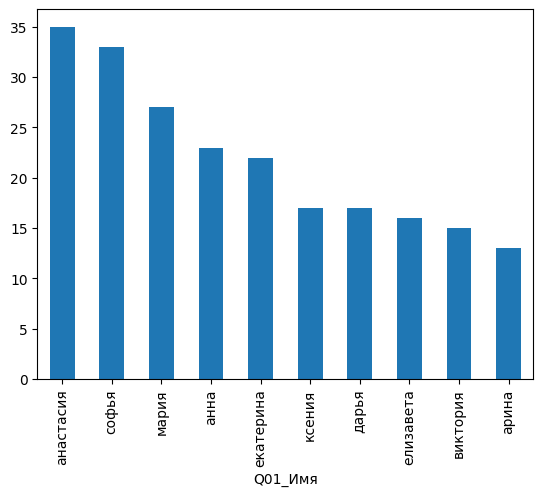

In [52]:
cities=df["Q01_Имя"].value_counts().sort_values(ascending=False).head(10)
cities.plot.bar()

In [53]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 334 to 349
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Q01_Имя                             511 non-null    object 
 1   Q02_Возраст                         511 non-null    float64
 2   Q03_День рождения                   511 non-null    int64  
 3   Q04_Месяц рождения                  511 non-null    float64
 4   Q05_Рост в сантиметрах              511 non-null    int64  
 5   Q06_Ваш родной город                511 non-null    object 
 6   Q07_Средний балл                    511 non-null    float64
 7   Q08_Бросили игральный кубик с цифр  511 non-null    float64
 8   Q09_Ваш любимый цвет                511 non-null    object 
 9   Q10_Напишите фразу                  511 non-null    object 
 10  Q11_Данная цитата                   511 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage:

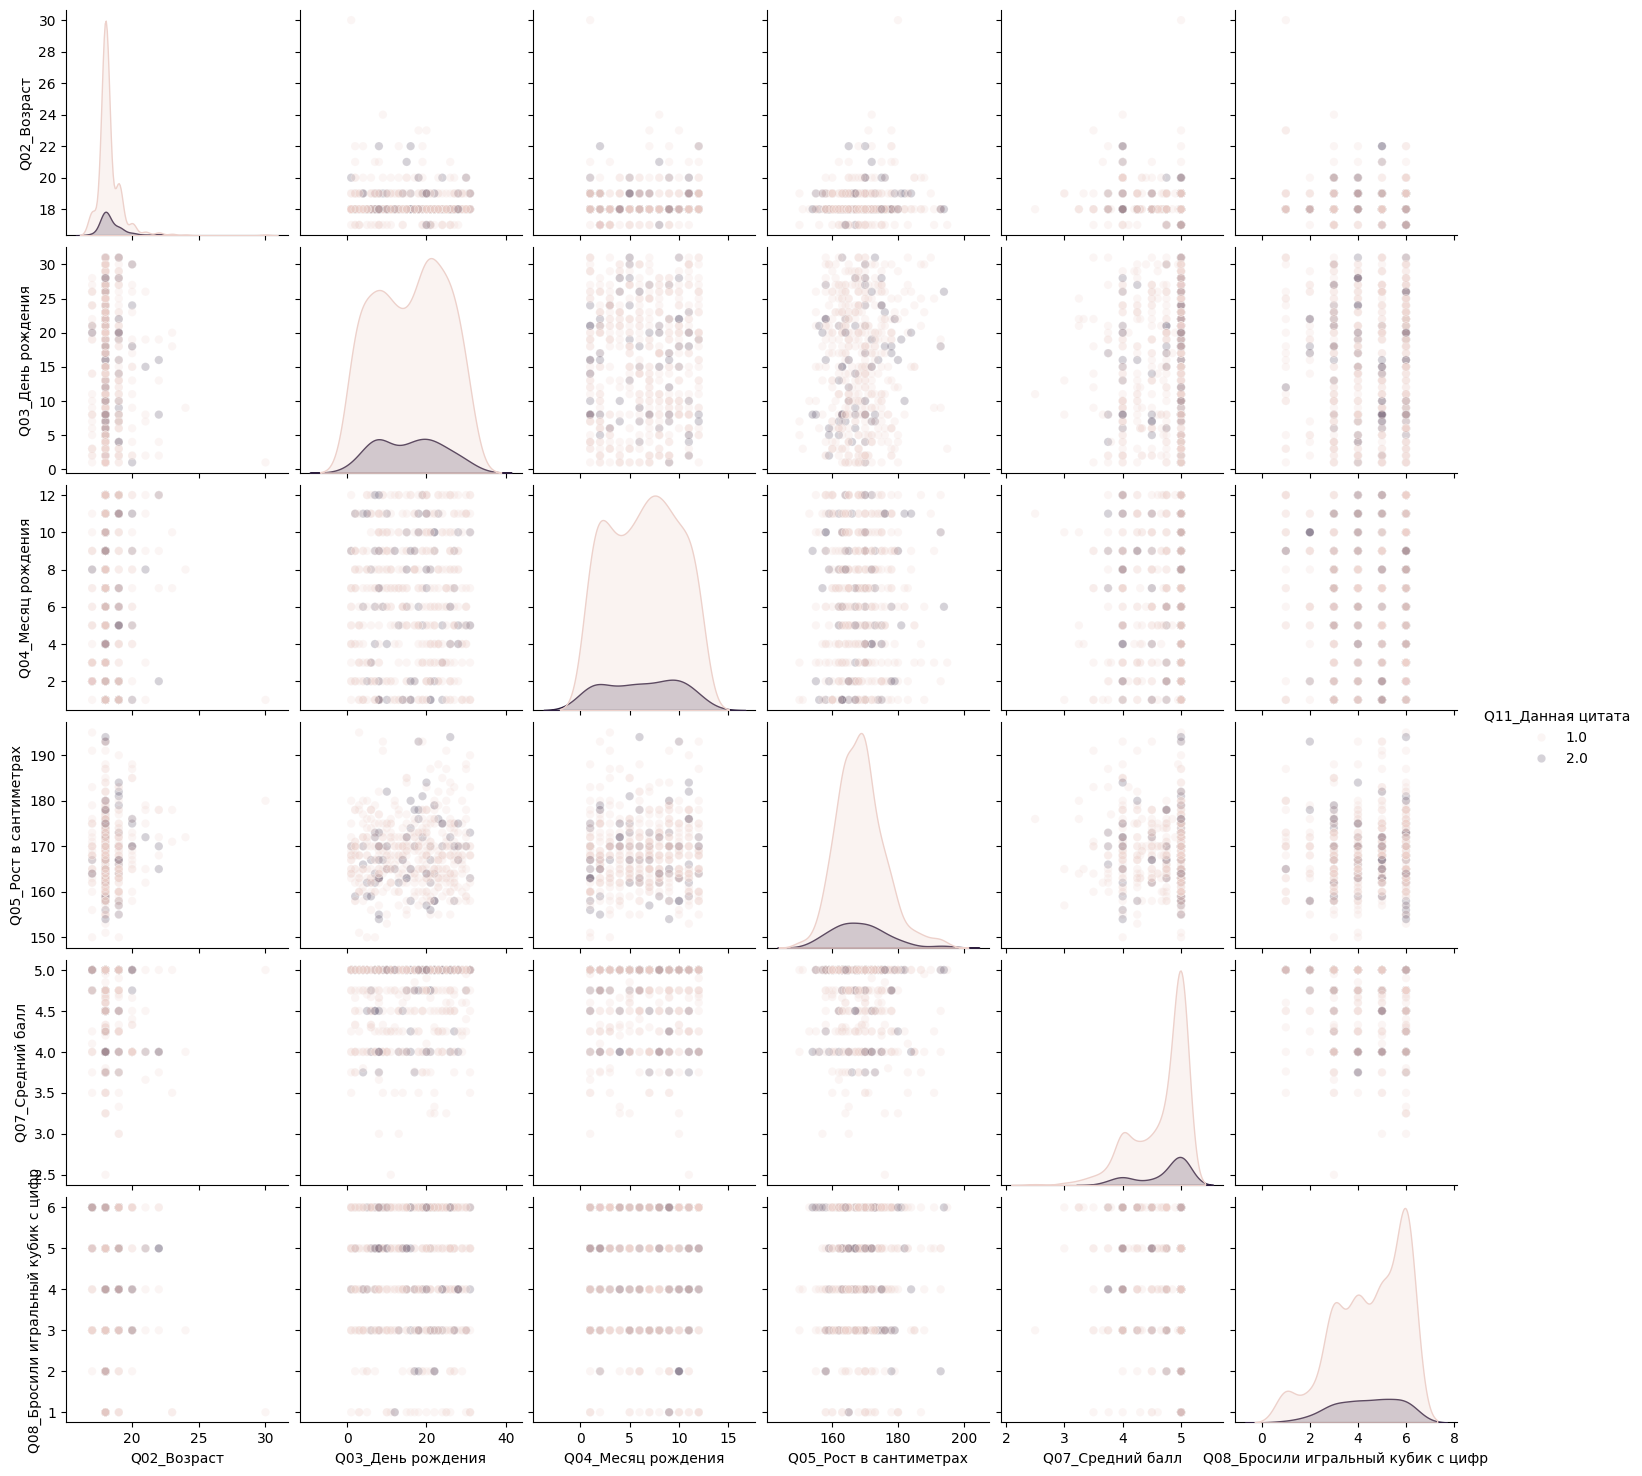

In [54]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2},hue="Q11_Данная цитата")

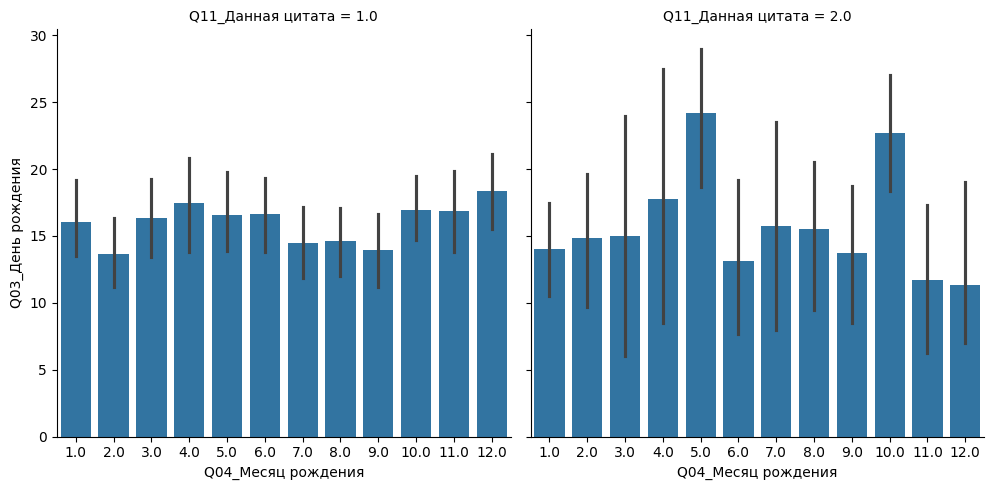

In [55]:
sns.catplot(x='Q04_Месяц рождения', y='Q03_День рождения', col='Q11_Данная цитата', kind='bar', data=df)

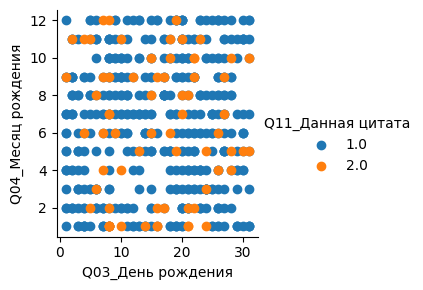

In [56]:
sns.FacetGrid(df, hue = 'Q11_Данная цитата') \
    .map(plt.scatter, 'Q03_День рождения','Q04_Месяц рождения') \
    .add_legend()

<Axes: ylabel='Q07_Средний балл'>

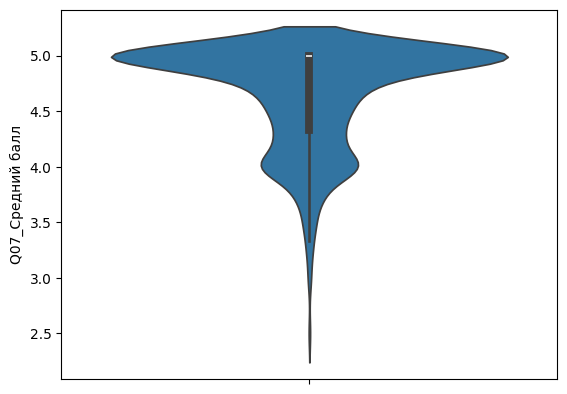

In [57]:
sns.violinplot(y = df["Q07_Средний балл"])

In [58]:
# Заменим категориальные данные на числовые коды из словаря
encoder = LabelEncoder()
df['Q01_Имя'] = encoder.fit_transform(df['Q01_Имя'])
df['Q01_Имя'] = df['Q01_Имя'].astype(np.number)
df['Q06_Ваш родной город'] = encoder.fit_transform(df['Q06_Ваш родной город'])
df['Q06_Ваш родной город'] = df['Q06_Ваш родной город'].astype(np.number)
df['Q09_Ваш любимый цвет'] = encoder.fit_transform(df['Q09_Ваш любимый цвет'])
df['Q09_Ваш любимый цвет'] = df['Q09_Ваш любимый цвет'].astype(np.number)

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [59]:
df["Q02_Возраст"]=df["Q02_Возраст"].astype(np.number)
df["Q03_День рождения"]=df["Q03_День рождения"].astype(np.number)
df["Q04_Месяц рождения"]=df["Q04_Месяц рождения"].astype(np.number)
df["Q05_Рост в сантиметрах"]=df["Q05_Рост в сантиметрах"].astype(np.number)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 334 to 349
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Q01_Имя                             511 non-null    float64
 1   Q02_Возраст                         511 non-null    float64
 2   Q03_День рождения                   511 non-null    float64
 3   Q04_Месяц рождения                  511 non-null    float64
 4   Q05_Рост в сантиметрах              511 non-null    float64
 5   Q06_Ваш родной город                511 non-null    float64
 6   Q07_Средний балл                    511 non-null    float64
 7   Q08_Бросили игральный кубик с цифр  511 non-null    float64
 8   Q09_Ваш любимый цвет                511 non-null    float64
 9   Q10_Напишите фразу                  511 non-null    object 
 10  Q11_Данная цитата                   511 non-null    float64
dtypes: float64(10), object(1)
memory usage: 47.9+ KB

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.d

In [60]:
df.head()

,Q01_Имя,Q02_Возраст,Q03_День рождения,Q04_Месяц рождения,Q05_Рост в сантиметрах,Q06_Ваш родной город,Q07_Средний балл,Q08_Бросили игральный кубик с цифр,Q09_Ваш любимый цвет,Q10_Напишите фразу,Q11_Данная цитата
Response,,,,,,,,,,,
334,41.0,19.0,19.0,5.0,181.0,72.0,5.00,6.0,10.0,Я люблю Сатану,2.0
87,53.0,19.0,4.0,11.0,166.0,150.0,3.75,4.0,10.0,Надя ест булку,2.0
337,44.0,20.0,30.0,6.0,170.0,47.0,4.40,6.0,10.0,я завариваю чай,1.0
336,114.0,18.0,15.0,2.0,166.0,62.0,4.75,4.0,18.0,Мама варит суп,1.0
335,97.0,23.0,20.0,10.0,178.0,2.0,5.00,1.0,20.0,Птицы видят звезды,1.0


In [61]:
# Найдем распределение студентов по комбинации день+месяц рождения
print(df.groupby(['Q04_Месяц рождения','Q03_День рождения']).size().sort_values(ascending=False))

Q04_Месяц рождения  Q03_День рождения
3.0                 24.0                 6
1.0                 8.0                  6
8.0                 17.0                 6
12.0                20.0                 4
2.0                 21.0                 4
                                        ..
12.0                24.0                 1
1.0                 1.0                  1
12.0                27.0                 1
                    28.0                 1
                    30.0                 1
Length: 268, dtype: int64


In [62]:
#Мы нашли средний балл по выборке студентов. В каких границах он распределен в генеральной совокупности?
sample_size = df.shape[0]
#статистика для вероятности 5%
number_of_std_dvt = 1.644
sample_mean = np.mean(df["Q07_Средний балл"])
sample_std_dvt = np.std(df["Q07_Средний балл"])
estimated_std_dvt = sample_std_dvt / np.sqrt(sample_size)
margin_of_error = number_of_std_dvt * estimated_std_dvt
print({ "error": margin_of_error, "mean": sample_mean })
print("Среднее значение в генеральной совокупности находится в интервале ",[sample_mean-margin_of_error,sample_mean+margin_of_error])


{'error': np.float64(0.03322316924504885), 'mean': np.float64(4.665812133072406)}
Среднее значение в генеральной совокупности находится в интервале  [np.float64(4.632588963827358), np.float64(4.699035302317455)]


In [63]:
#Одновыборочный t-критерий используется для проверки того, равно ли среднее значение совокупности некоторому значению.
#Проверим соответствует ли средний балл по выборке 4.5
from scipy.stats import ttest_1samp
my_mean = 4.5
stat,p=ttest_1samp(df["Q07_Средний балл"], popmean=my_mean)
print(stat,p)
alpha=0.05
if p < alpha:
    print('Средний балл значимо отличается от ',my_mean)
else:
    print('Средний балл не отличается от ',my_mean)

8.196938919111785 2.0084980813885e-15
Средний балл значимо отличается от  4.5


In [64]:
#Проверим гипотезу:
# Н0 - Вероятность встретить в нашей выборке любителей Аристотеля и Платона одинакова
# Н1 - Вероятность встретить в нашей выборке любителей Аристотеля и Платона не одинакова
from scipy.stats import binomtest
bins = df['Q11_Данная цитата'].value_counts().tolist()
print(bins)
result=binomtest(bins[0],bins[0]+bins[1])
if  result.pvalue> 0.5:
  print("Bероятность встретить в нашей выборке любителей Аристотеля и Платона одинакова")
else:
  print("Н1 - Вероятность встретить в нашей выборке любителей Аристотеля и Платона не одинакова")


[444, 67]
Н1 - Вероятность встретить в нашей выборке любителей Аристотеля и Платона не одинакова


In [65]:
#Проверим гипотезу:
# Н0 - Возраст студентов распределен нормально
# Н1 - Возраст студентов не распределен нормально
from scipy.stats import shapiro
alpha=0.05
stat, p = shapiro(df["Q02_Возраст"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

if p < alpha:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')

Statistics=0.571, p-value=0.000
Отклонить гипотезу о нормальности


In [66]:
#H0 - Средний балл у среди групп любителей Платнона или Аристотеля распределен одинаково
#H1 - Средний балл у среди групп любителей Платнона или Аристотеля распределен не одинаково
from scipy.stats import ttest_ind
group1 = df[df['Q11_Данная цитата']==1]
group2 = df[df['Q11_Данная цитата']==2]
alpha=0.05
stat,p=ttest_ind(group1["Q07_Средний балл"], group2["Q07_Средний балл"])
print(stat,p)
if p < alpha:
    print('Отклонить гипотезу ')
else:
    print('Принять гипотезу ')

-0.8282450021423355 0.4079199402064999
Принять гипотезу 


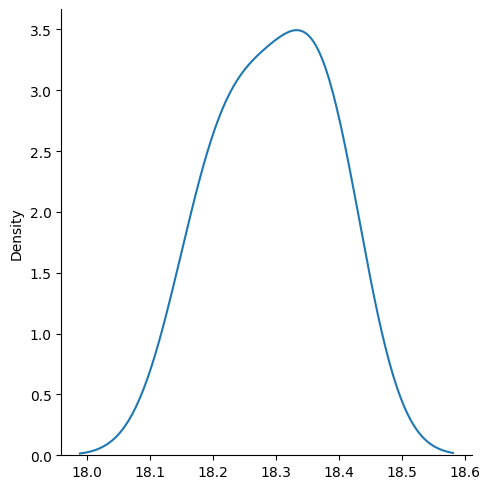

In [67]:
#Закон больших чисел
import random
n=5
res=[]
mean=df["Q02_Возраст"].mean()
for k in range(n):
  m=df["Q02_Возраст"].sample(n=100).mean()
  res.append(m)
res=np.array(res)
sns.displot(res, kind="kde")

In [68]:
from scipy.stats import shapiro
stat, p = shapiro(res)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о нормальности')
else:
    print('Принять гипотезу о нормальности')

Statistics=0.945, p-value=0.703
Принять гипотезу о нормальности
